### Імпортування бібліотек

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')


from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn import metrics

### Зчитування датасету

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

ds = pd.read_csv('../data/variant_1_modified.csv')
ds = ds.drop(["ID", "year", "Upfront_charges"], axis="columns") #дропаємо рік та id, адже рік у датасеті лише один

### Встановлення цільової змінної

In [3]:
ds['Status'].value_counts()

Status
0    37719
1    12281
Name: count, dtype: int64

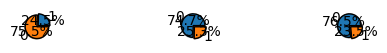

In [4]:
X = ds.drop(['Status'], axis=1)
Y = ds['Status']

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.7)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.3)

for i, y_set in enumerate([Y_train, Y_valid, Y_test]):
    plt.subplot(10, 4, i + 1)
    plt.rcParams["figure.figsize"] = (50, 50)
    labels = y_set.astype('str').unique().tolist()
    slices = [y_set.astype('str').value_counts()[i] for i in labels]
    plt.pie(slices, labels=labels, explode=[0.07 for i in range(len(labels))], wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
    plt.tight_layout()


### Тестування різноманітних моделей

In [6]:
svc_classifier = SVC()
svc_classifier.fit(X_train, Y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3443
           1       0.96      0.08      0.14      1057

    accuracy                           0.78      4500
   macro avg       0.87      0.54      0.51      4500
weighted avg       0.82      0.78      0.70      4500



In [7]:
reg_log = LogisticRegression()
reg_log.fit(X_train, Y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3443
           1       0.50      0.00      0.00      1057

    accuracy                           0.77      4500
   macro avg       0.63      0.50      0.43      4500
weighted avg       0.70      0.77      0.66      4500



In [8]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3443
           1       0.71      0.02      0.03      1057

    accuracy                           0.77      4500
   macro avg       0.74      0.51      0.45      4500
weighted avg       0.75      0.77      0.67      4500



In [9]:
sgb_classifier = SGDClassifier()
sgb_classifier.fit(X_train, Y_train)
y_pred = sgb_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3443
           1       0.92      0.05      0.09      1057

    accuracy                           0.77      4500
   macro avg       0.85      0.52      0.48      4500
weighted avg       0.81      0.77      0.69      4500



In [10]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, Y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3443
           1       0.74      0.46      0.57      1057

    accuracy                           0.83      4500
   macro avg       0.79      0.71      0.73      4500
weighted avg       0.82      0.83      0.82      4500



In [11]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3443
           1       1.00      1.00      1.00      1057

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [12]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3443
           1       1.00      1.00      1.00      1057

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [13]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3443
           1       1.00      1.00      1.00      1057

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [14]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, Y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3443
           1       1.00      1.00      1.00      1057

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



### Порівняльна характеристика моделей

In [17]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'SGD': SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=2),
    'Random Forest': RandomForestClassifier(verbose=0, max_depth=2),
    'Extra Trees': ExtraTreesClassifier(verbose=0, max_depth=2),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(verbose=0, max_depth=2),
    'Naive Bayes': GaussianNB()
}



In [18]:
def fit_predict_score(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    Y_pred = np.round(model.predict(X_valid.values))
    return metrics.accuracy_score(Y_valid, Y_pred), metrics.f1_score(Y_valid, Y_pred, average='weighted')

# create a function to evaluate models
def evaluate_models(models, X_train, Y_train, X_valid, Y_valid):
    results = {'Model': [], 'Accuracy': [], 'F1 Score': []}
    for model_name, model in models.items():
        print(f'Evaluating {model_name}...')
        accuracy, f1 = fit_predict_score(model, X_train, Y_train, X_valid, Y_valid)
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['F1 Score'].append(f1)
    return pd.DataFrame(results)

# evaluate models
results = evaluate_models(models, X_train, Y_train, X_valid, Y_valid)

Evaluating Linear Regression...
Evaluating Logistic Regression...


Evaluating K-Nearest Neighbors...
Evaluating SVM...
Evaluating SGD...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating Naive Bayes...


In [19]:
results.sort_values('F1 Score', ascending=False)

,Model,Accuracy,F1 Score
8,AdaBoost,0.999905,0.999905
9,Gradient Boosting,0.999905,0.999905
0,Linear Regression,0.857048,0.835900
5,Decision Tree,0.852286,0.828439
6,Random Forest,0.851619,0.827496
2,K-Nearest Neighbors,0.823238,0.806608
7,Extra Trees,0.769714,0.688750
3,SVM,0.762190,0.675527
10,Naive Bayes,0.748857,0.645375
1,Logistic Regression,0.747333,0.639365


In [20]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
drop = []
X_columns = ds.columns
print('Feature ranking : ')
for x in range(X_train.shape[1]):
    print("%d. %s (%f)" % (x + 1, X_columns[indices[x]], importances[indices[x]]))

Feature ranking : 
1. Interest_rate_spread (0.377489)
2. rate_of_interest (0.260349)
3. credit_type_CRIF (0.164991)
4. LTV (0.037044)
5. property_value (0.020168)
6. income (0.018598)
7. loan_amount (0.011721)
8. total_units_4U (0.010254)
9. Neg_ammortization_neg_amm (0.009757)
10. Unnamed: 0 (0.007032)
11. credit_type_EXP (0.006720)
12. Credit_Score (0.006205)
13. interest_only_not_int (0.006101)
14. Unnamed: 0.1 (0.005840)
15. credit_type_EQUI (0.005097)
16. business_or_commercial_nob/c (0.005072)
17. term (0.004746)
18. age_Missing (0.004420)
19. open_credit_opc (0.003550)
20. submission_of_application_not_inst (0.002759)
21. loan_purpose_p4 (0.002723)
22. loan_type_type2 (0.002675)
23. loan_purpose_p3 (0.001844)
24. approv_in_adv_pre (0.001813)
25. Status (0.001681)
26. construction_type_sb (0.001638)
27. Gender_Sex Not Available (0.001578)
28. age_>74 (0.001451)
29. approv_in_adv_nopre (0.001312)
30. age_55-64 (0.001292)
31. loan_limit_cf (0.001219)
32. loan_type_type3 (0.001204)


### Аналіз моделей

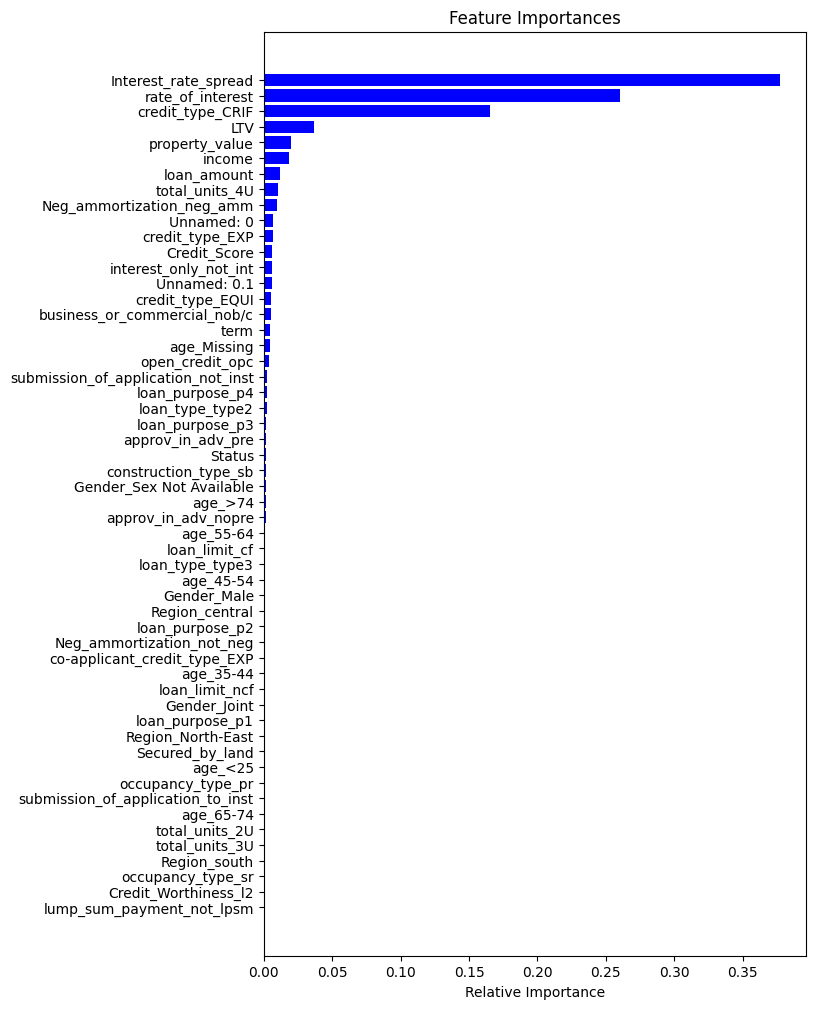

In [21]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. loan_amount (0.006444)
2. Region_south (0.000000)
3. Gender_Sex Not Available (0.000000)
4. open_credit_opc (0.000000)
5. Credit_Worthiness_l2 (0.000000)
6. loan_purpose_p4 (0.000000)
7. loan_purpose_p3 (0.000000)
8. loan_purpose_p2 (0.000000)
9. loan_purpose_p1 (0.000000)
10. loan_type_type3 (0.000000)
11. loan_type_type2 (0.000000)
12. approv_in_adv_pre (0.000000)
13. approv_in_adv_nopre (0.000000)
14. Gender_Male (0.000000)
15. Neg_ammortization_neg_amm (0.000000)
16. Gender_Joint (0.000000)
17. loan_limit_ncf (0.000000)
18. loan_limit_cf (0.000000)
19. Status (0.000000)
20. LTV (0.000000)
21. Credit_Score (0.000000)
22. Interest_rate_spread (0.000000)
23. rate_of_interest (0.000000)
24. Unnamed: 0 (0.000000)
25. Region_central (0.000000)
26. business_or_commercial_nob/c (0.000000)
27. Neg_ammortization_not_neg (0.000000)
28. co-applicant_credit_type_EXP (0.000000)
29. Region_North-East (0.000000)
30. submission_of_application_to_inst (0.000000)
31. submission_of

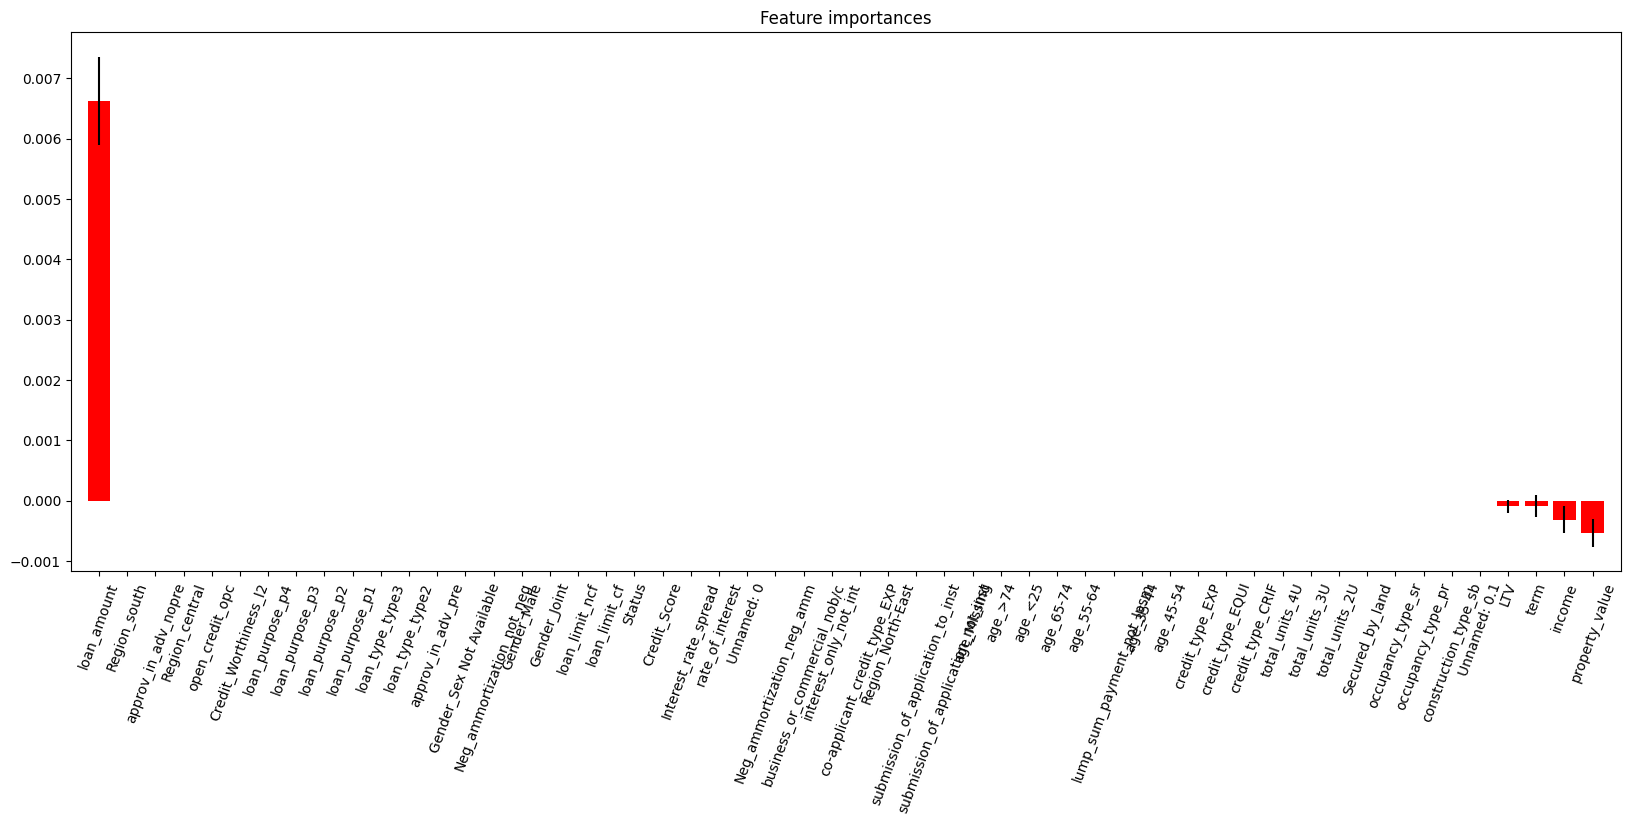

In [23]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

оскільки помітив дуже значу кореляцію між Upfront charges та значенням колонки status, для корекції навчання моделей, опущу дану колонку з датасету

<Figure size 200x200 with 0 Axes>

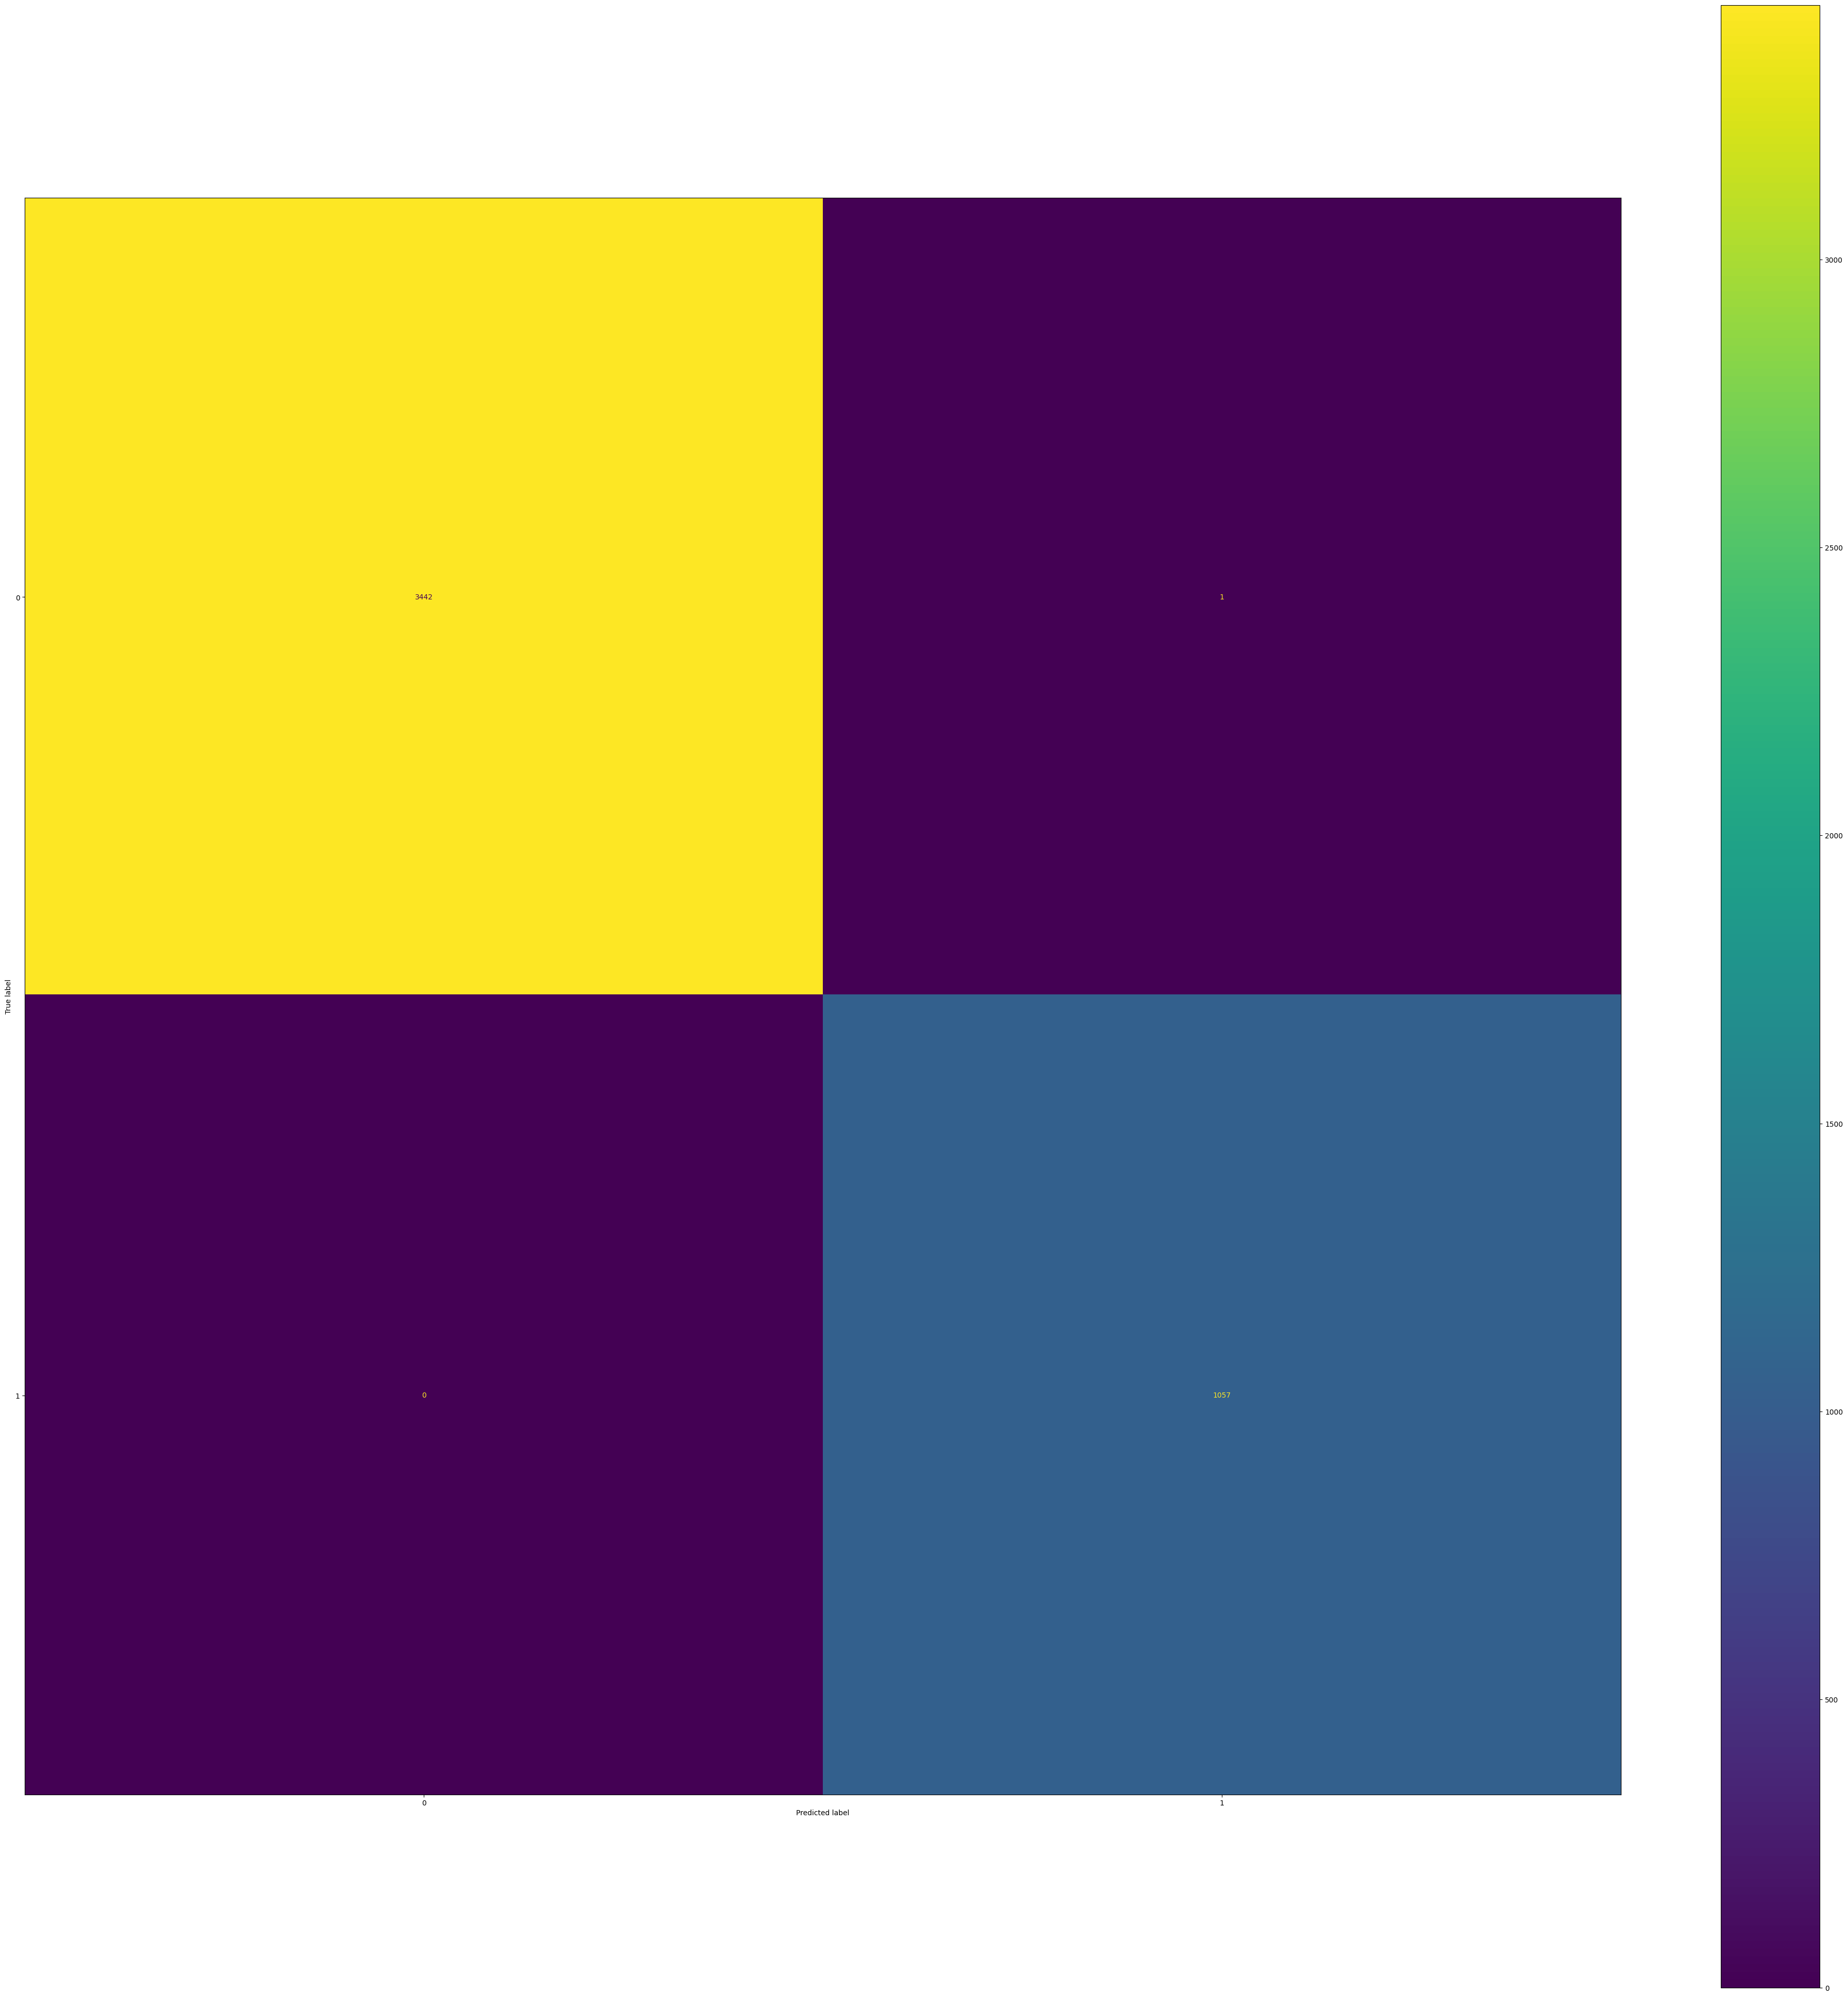

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(2, 2))  # Adjust the figure size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()
